## Description

Every year companies hire various employees. The company invest time and money in training these new as well as old employees to increases effectiveness of company.

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
df=pd.read_csv(r"HRAnalytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Target variable: Attrition

In [5]:
df.shape

(1470, 35)

No. of rows= 1470

No. of columns= 35

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data does not have any null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
obj_lst=["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime"]
for col in obj_lst:
    print(col," values are :\n",df[col].value_counts(),"\n")

Attrition  values are :
 No     1233
Yes     237
Name: Attrition, dtype: int64 

BusinessTravel  values are :
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Department  values are :
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

EducationField  values are :
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Gender  values are :
 Male      882
Female    588
Name: Gender, dtype: int64 

JobRole  values are :
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, 

## EDA

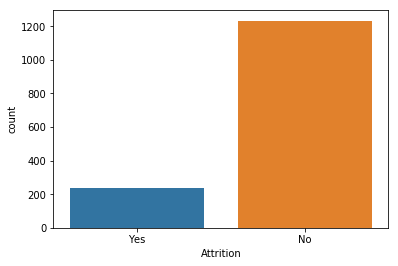

In [9]:
sns.countplot(x="Attrition",data=df)

From above plot we observe our data is imbalanced

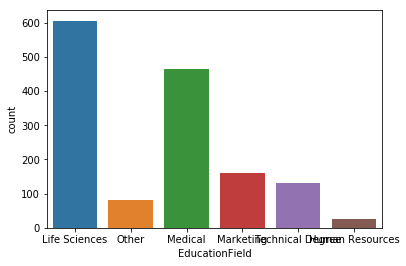

In [10]:
sns.countplot(x="EducationField",data=df)

#### Bivariate Analysis
We'll now check other features influence on attrition

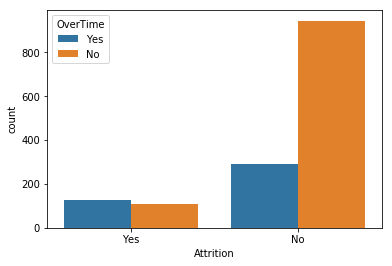

In [11]:
sns.countplot(df["Attrition"],hue=df["OverTime"])   
plt.show()

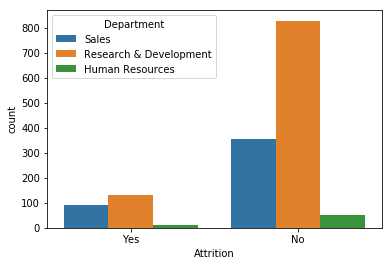

In [12]:
sns.countplot(df["Attrition"],hue=df["Department"])   
plt.show()

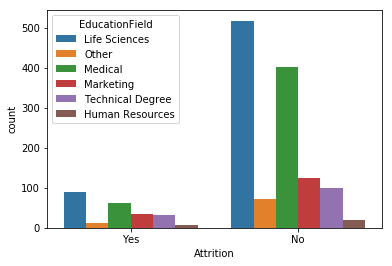

In [13]:
sns.countplot(df["Attrition"],hue=df["EducationField"])   
plt.show()

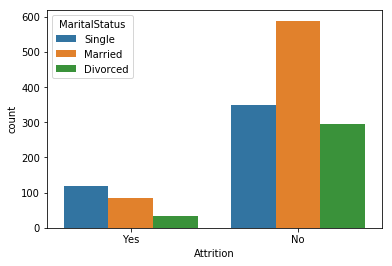

In [14]:
sns.countplot(df["Attrition"],hue=df["MaritalStatus"])   
plt.show()

In [15]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Now we will use Label Encoder to make our model machine learning friendy

In [16]:
lab_enc= LabelEncoder()
for i in obj_lst:
    df1= lab_enc.fit_transform(df[i])
    df[i]=df1
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


### Correlation

In [17]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


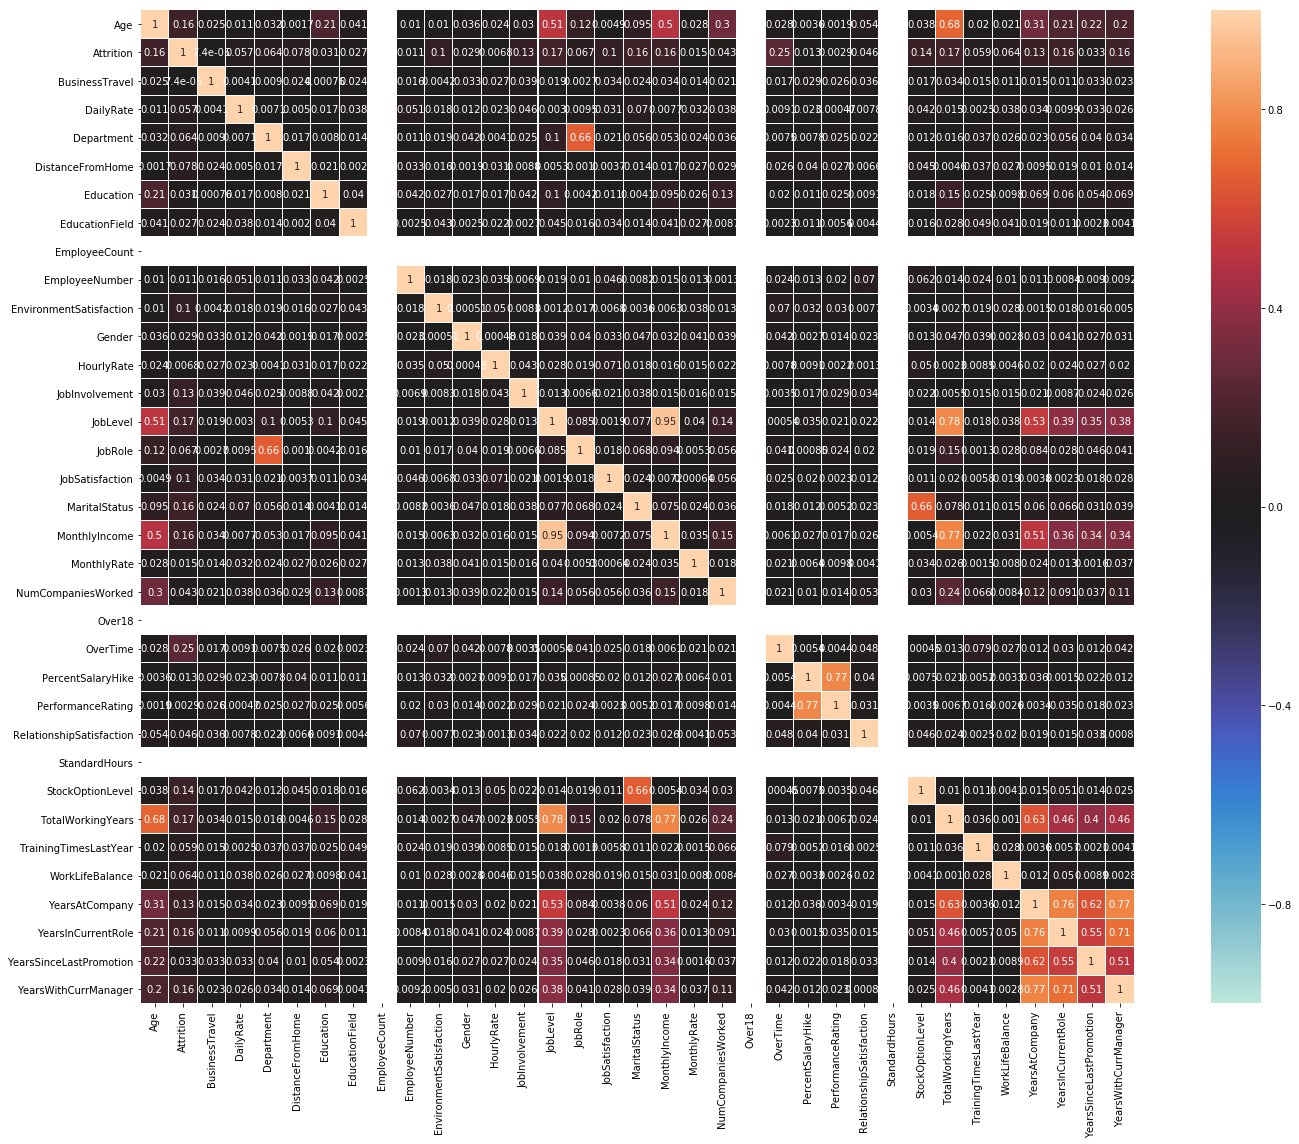

In [18]:
## HeatMap
df_corr= df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

"EmployeeCount", "StandardHours" and "Over18" have only one constant value and hence does not show any correlation with any of the variables and hence we can remove them

We observe positive as well as negative correlation between various feature and atrition. Age has 15.9% negative correlation, BusinessTravel has neglible correlatio, DailyRate 5.7% negative correlated, Department has 6.4% positive correlation, Distance from home has 7.8% positive correlation, Education has 3.1% negative correlation, Education field ha s2.7% negative correlation, EmployeeNumber has negligible correlation, EnvironmentSatisfaction has 10.3% negative correlation, gender has 3% correlation, Hourly rate has negligible correlation, JobEnvironment has 13% negative corrlation, JobLevel has 17% positive correlation, JobRole has 6.7% correlation, JobSatisfaction has 10.3% negative correlation, MaritalStatus has 16.2% positive correlation, MonthlyIncome has 16% negative correlation, MonthlyRate has 1% correlation, Number of companires worked has 4% correlation, OverTime has 24.6% positive correlation, PercentSalaryHike has 1.3% correlation, PerformanceRting has negligible correlation, RelationshipSatisfaction is 4.5% negatively correlated, StockOptionLevel is 13.7% negative correlation, TotalWorkingHours is 17.1% negatively correlated, TrainingTimesLastYear and WorklifeBalance is 6% negatively correlated, YearsAtcompany 13.4% negatively correlated, YearsInCurrentRole is 16% negatively correlated, YearsSinceLastPromotion is 3.3% correlated, YearswithCurrentManager is 15.6% negatively correlated.

TotalWorkingHours and JobRole are most correlated whereas businessTravel and monthlyRate are among the least correlated ones

### Check for outliers

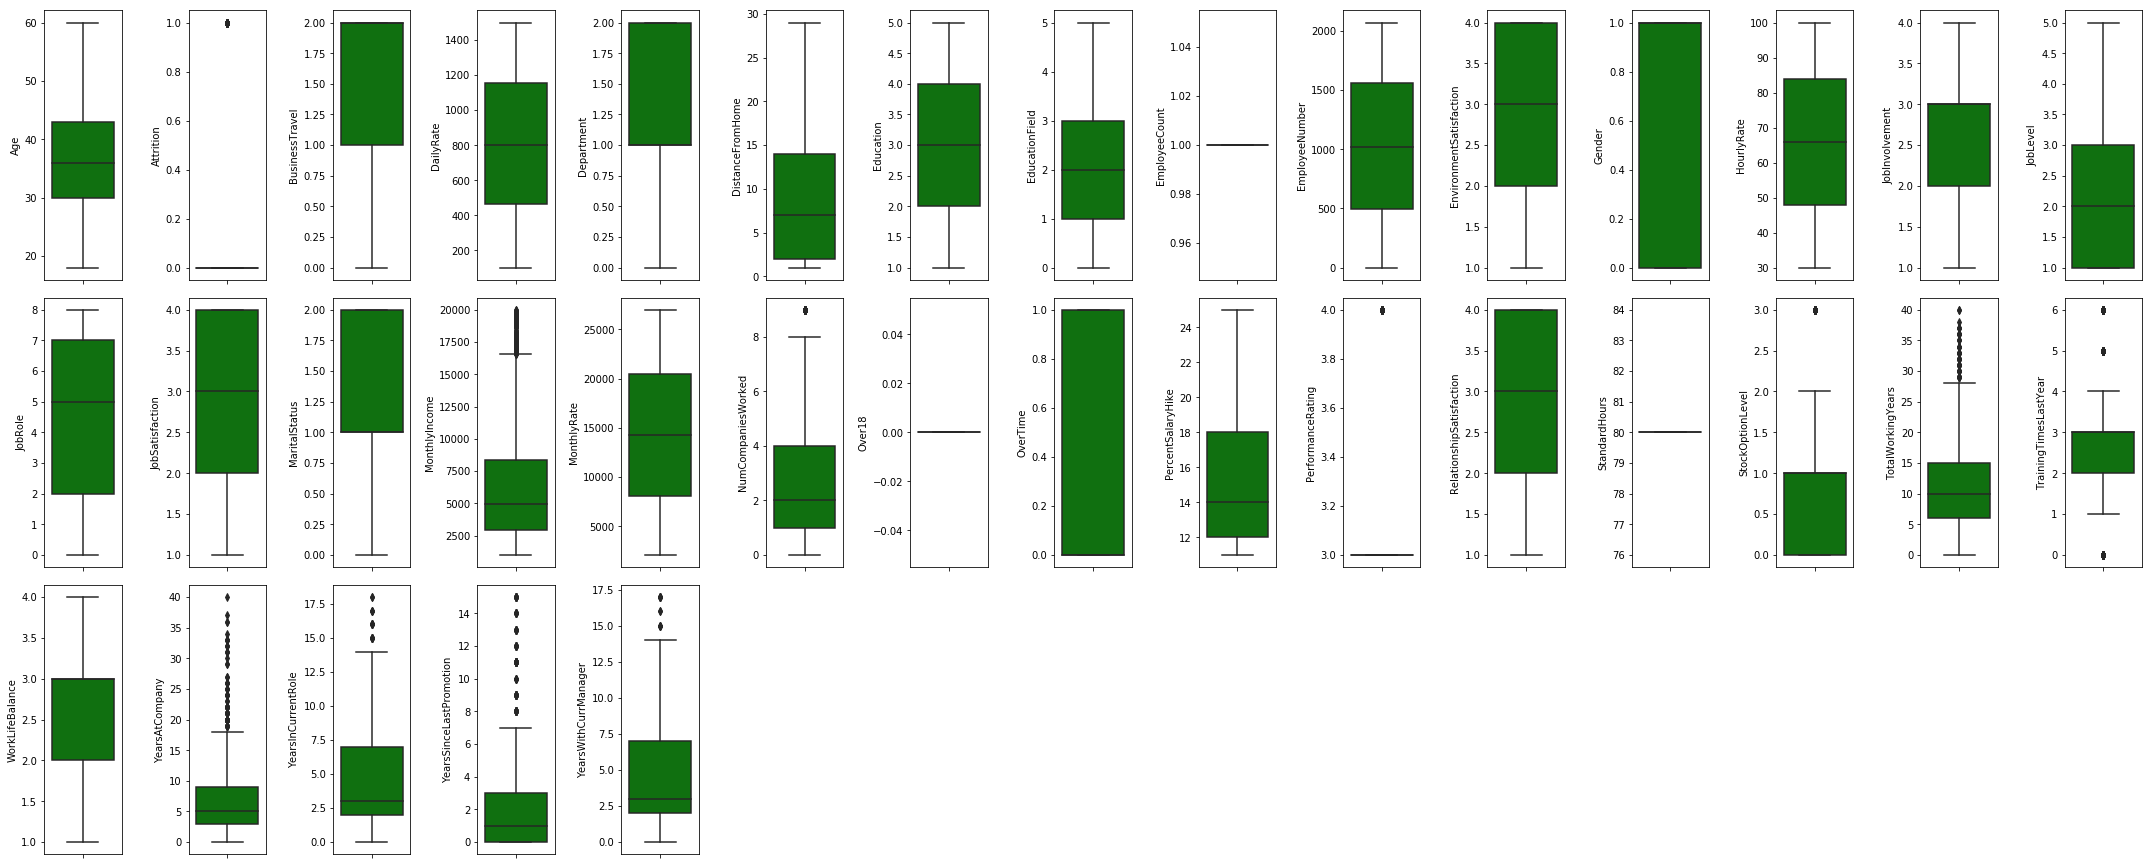

In [19]:
collist=df.columns.values
plt.figure(figsize=(30,40))
for i in range(0,len(collist)):
    plt.subplot(10,15,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

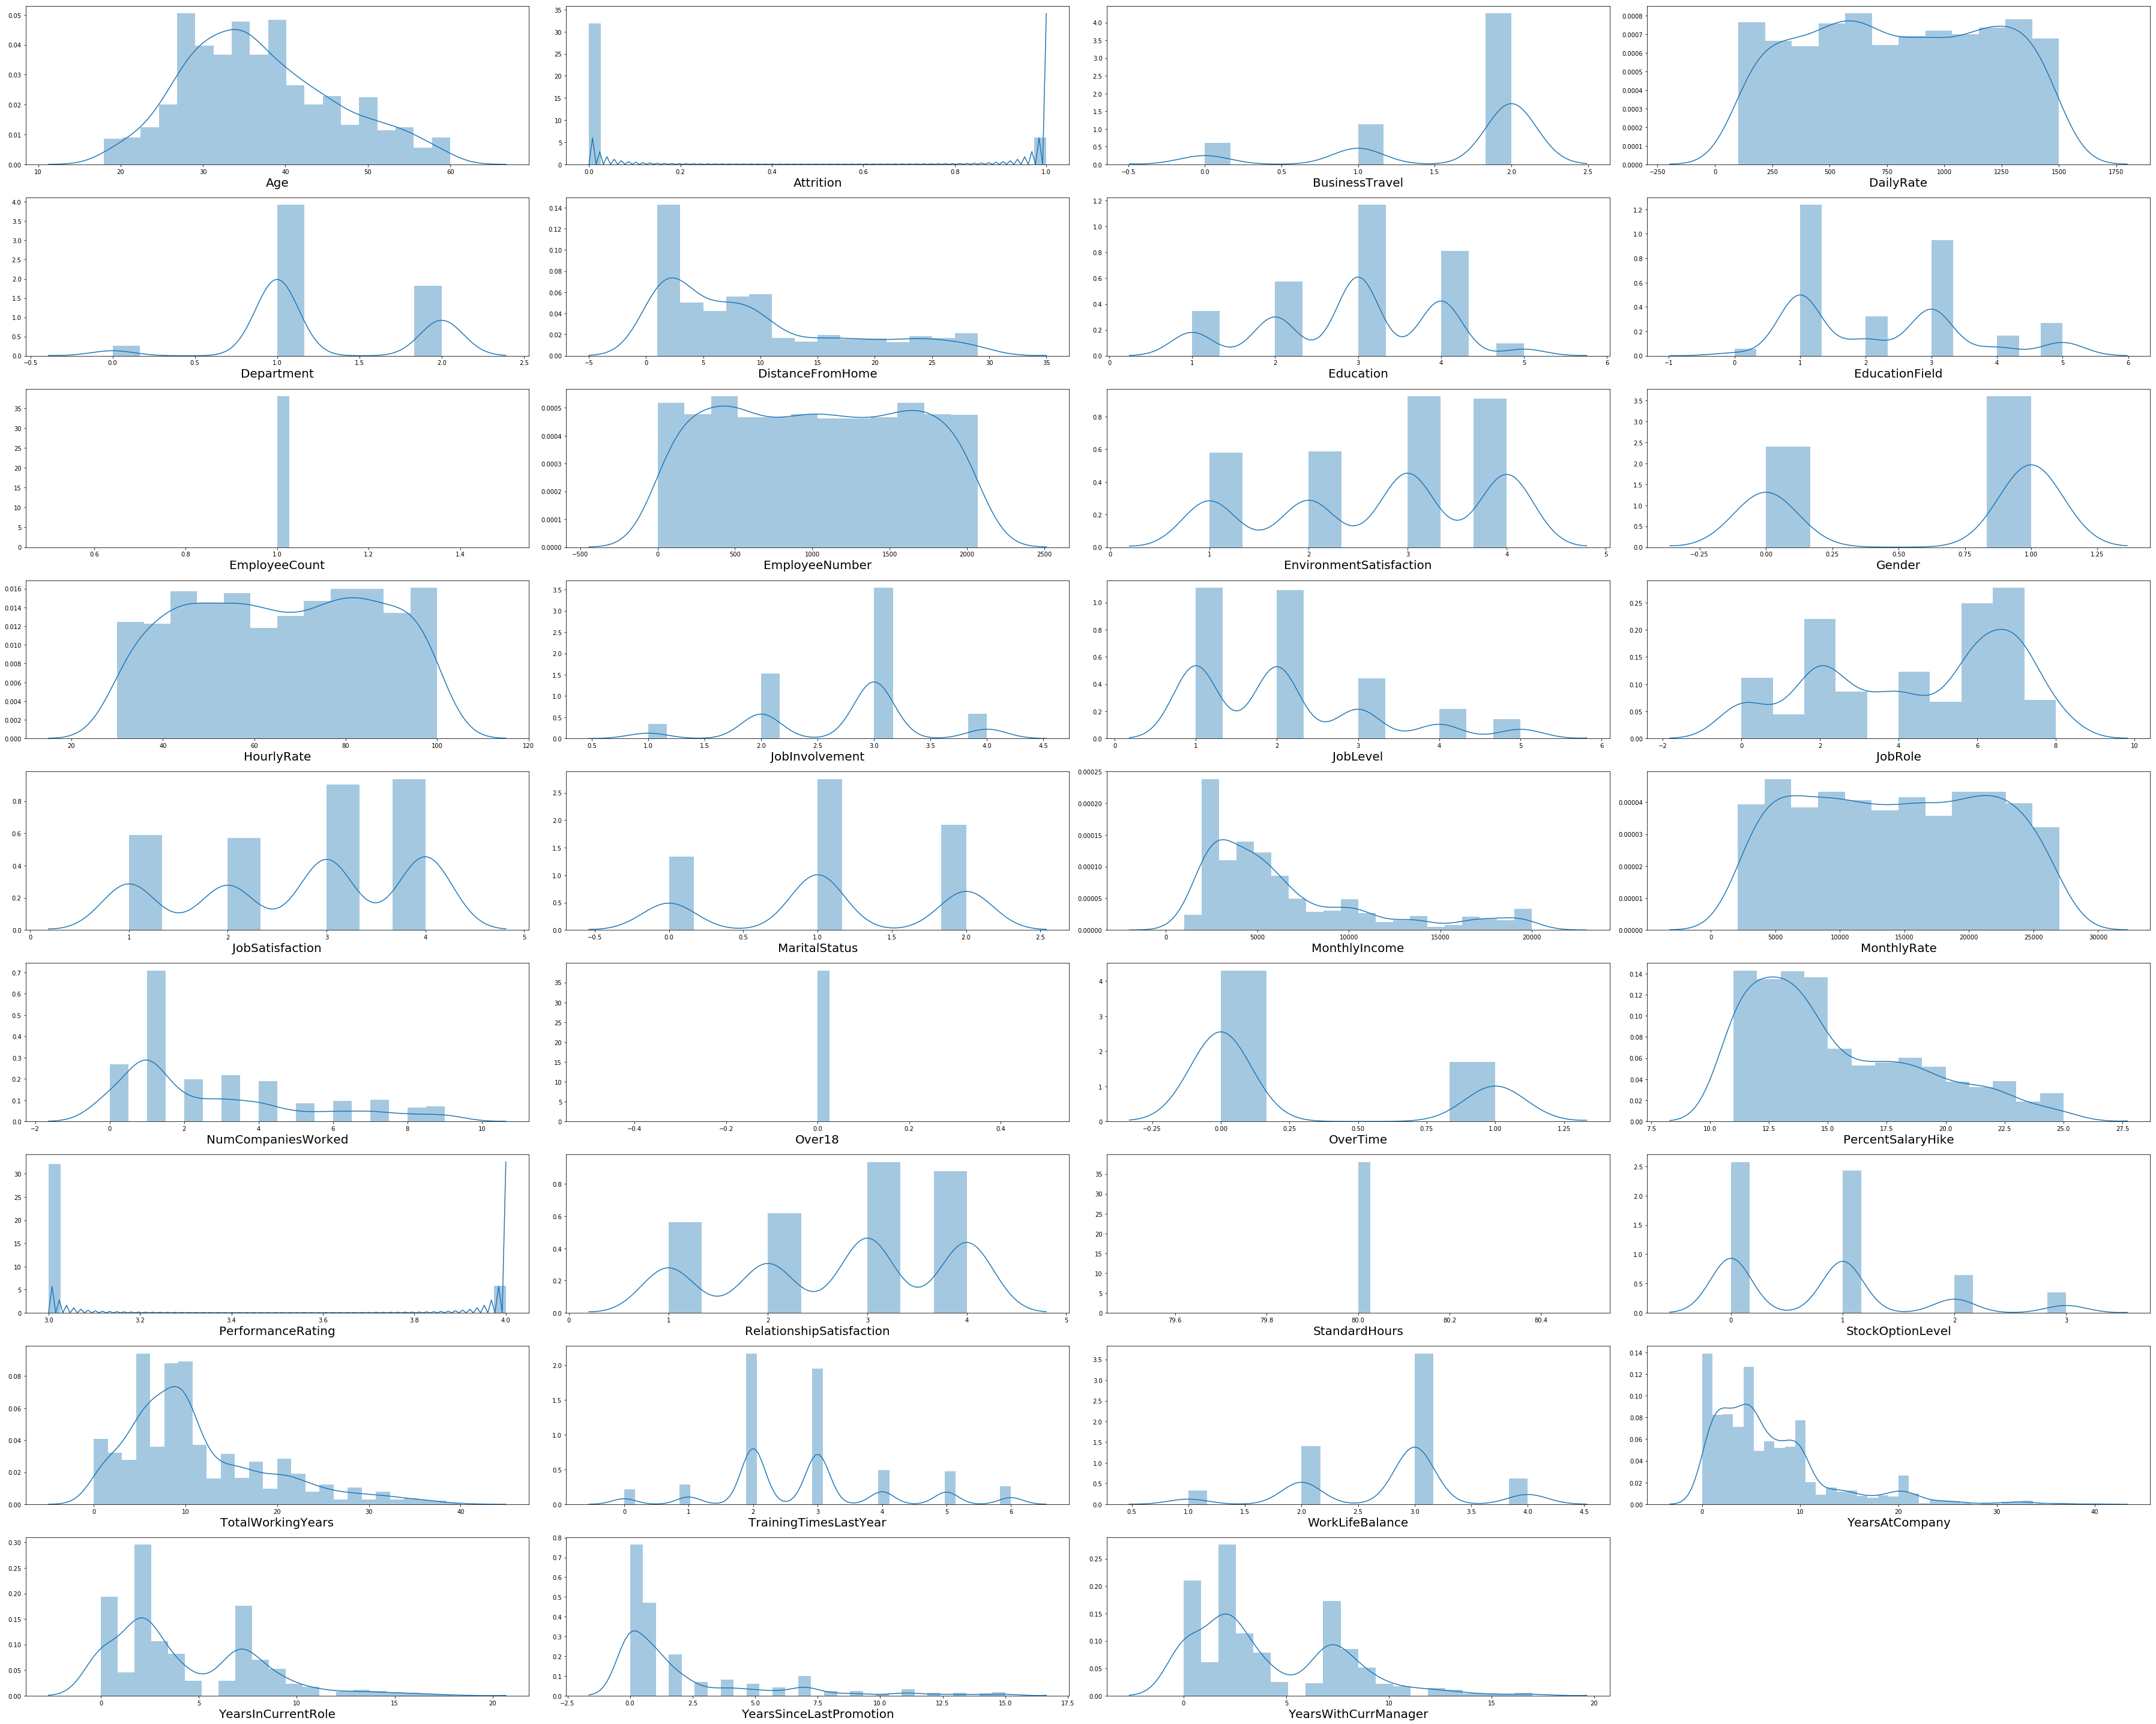

In [20]:
## checking for Normal Distribution of curve
plt.figure(figsize=(50,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

Data is not normally distributed nad we observe outliers and skewness in data

### Data Cleaning

In [21]:
z=np.abs(stats.zscore(df))
index=(np.where(z>3)[0])
df_new=df.drop(df.index[index])
df_new.shape

(1387, 35)

In [22]:
print("Percentage of data loss=",((1470-1387)/1470)*100)

Percentage of data loss= 5.646258503401361


In [23]:
df_new=df_new.drop(columns=["EmployeeCount","StandardHours","Over18","BusinessTravel"],axis=1)

#### Check for skewness in data

In [24]:
x=df_new.drop(columns=["Attrition"],axis=1)
y=df_new["Attrition"]

In [25]:
x.skew()

Age                         0.472280
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

We observe skewness in our data so we will use power transformation

In [26]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

#### Balancing our dataset

In [33]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [34]:
y_over.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [38]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x_over)

### Model Building

In [39]:
lr=LogisticRegression()

#### Finding best random state

In [40]:
for i in range(0,500):
    x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_over , test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    score_lr=accuracy_score(y_test,pred_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("Best random state is ",i)
        print("Training Score ",accuracy_score(y_train,pred_train)*100)
        print("Testing Score ",accuracy_score(y_test,pred_test)*100)
        break;

Best random state is  15
Training Score  79.96545768566494
Testing Score  79.96545768566494


In [42]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_over , test_size=0.25, random_state=15)

#### Logistic Regression

In [43]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
score_lr=accuracy_score(y_test,y_pred)
print("Logistic Regression model Score =",accuracy_score(y_test,y_pred))

Logistic Regression model Score = 0.7996545768566494


#### KNN Model

In [44]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred)
print("knn model Score =",accuracy_score(y_test,y_pred))

knn model Score = 0.7892918825561313


#### Decision Tree

In [45]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=accuracy_score(y_test,y_pred)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))

Decision Tree model Score = 0.8704663212435233


#### Support Vector Classifier

In [46]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
score_svc=accuracy_score(y_test,y_pred)
print("SVM model Score =",accuracy_score(y_test,y_pred))

SVM model Score = 0.9084628670120898


#### Using cross_val score to check for best model

In [48]:
cross_val_score(lr, x_scaled, y_over, cv=5)
cvs_lr=cross_val_score(LogisticRegression(), x_scaled, y_over, cv=5).mean()
print("Logistic Regression Cross Validation score= ",cvs_lr)

Logistic Regression Cross Validation score=  0.7586644447754524


In [49]:
cross_val_score(knn, x_scaled, y_over, cv=5)
cvs_knn=cross_val_score(KNeighborsClassifier(), x_scaled, y_over, cv=5).mean()
print("KNeighborsClassifier Cross Validation score= ",cvs_knn)

KNeighborsClassifier Cross Validation score=  0.7685782378789007


In [50]:
cross_val_score(dt, x_scaled, y_over, cv=5)
cvs_dt=cross_val_score(DecisionTreeClassifier(), x_scaled, y_over, cv=5).mean()
print("DecisionTree Classifier Cross Validation score= ",cvs_dt)

DecisionTree Classifier Cross Validation score=  0.6693109034035898


In [51]:
cross_val_score(svc, x_scaled, y_over, cv=5)
cvs_svm=cross_val_score(SVC(), x_scaled, y_over, cv=5).mean()
print("SVC Cross Validation score= ",cvs_svm)

SVC Cross Validation score=  0.8994144261562523


Check for differnce between accuracy score and cross validation score

In [52]:
print("Logistic Regression: ",(score_lr-cvs_lr))

Logistic Regression:  0.04099013208119706


In [53]:
print("KNN Model: ",(score_knn-cvs_knn))

KNN Model:  0.02071364467723058


In [54]:
print("Decision Tree: ",(score_dt-cvs_dt))

Decision Tree:  0.20115541783993351


In [55]:
print("SVM: ",(score_svc-cvs_svm))

SVM:  0.009048440855837447


From above scores we observe SVM is our best model thus now we will tune our model

### ROC

In [56]:
print("ROC_AUC_Score for decisiontreeClassifier= ",roc_auc_score(y_test,dt.predict(x_test)))

print("ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,lr.predict(x_test)))

print("ROC_AUC_Score for KNeighboursClassifier= ",roc_auc_score(y_test,knn.predict(x_test)))

print("ROC_AUC_Score for SVM= ",roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_Score for decisiontreeClassifier=  0.8704450542894643
ROC_AUC_Score for Logistic Regression=  0.7996241498627848
ROC_AUC_Score for KNeighboursClassifier=  0.7889571650161079
ROC_AUC_Score for SVM=  0.908423815773774


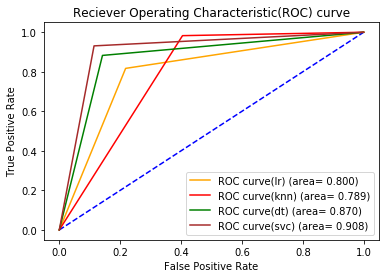

In [57]:
fpr, tpr, threshold= roc_curve(y_test,lr.predict(x_test))
plt.plot(fpr,tpr,color='orange',label='ROC curve(lr) (area= %0.3f)'%(roc_auc_score(y_test,lr.predict(x_test))))
plt.plot([0,1],[0,1], color='blue', linestyle='--')

fpr, tpr, threshold= roc_curve(y_test,knn.predict(x_test))
plt.plot(fpr,tpr,color='red', label='ROC curve(knn) (area= %0.3f)'%(roc_auc_score(y_test,knn.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,dt.predict(x_test))
plt.plot(fpr,tpr,color='green', label='ROC curve(dt) (area= %0.3f)'%(roc_auc_score(y_test,dt.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,svc.predict(x_test))
plt.plot(fpr,tpr,color='brown', label='ROC curve(svc) (area= %0.3f)'%(roc_auc_score(y_test,svc.predict(x_test))))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show() 

### Hyper Parametric tuning

In [58]:
svc=SVC()
param={'kernel':['linear','poly','rbf'],'gamma':['scale','auto'] ,'probability':[True, False],'degree':[2,3,4,5]}
grid_search=GridSearchCV(estimator=svc, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}


In [59]:
clf=SVC(kernel='poly', degree=5, gamma="scale", probability=True)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9481865284974094

In [60]:
cfm =confusion_matrix(y_test,y_pred)
print("Accuracy Score :",clf.score(x_test,y_test))
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))
print("\n ROC_AUC_Score for SVM= ",roc_auc_score(y_test,clf.predict(x_test)))

Accuracy Score : 0.9481865284974094
Confusion Matrix :
 [[256  33]
 [ 20 270]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       289
           1       0.89      0.93      0.91       290

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579


 ROC_AUC_Score for SVM=  0.9481684763154755


#### Saving Model

In [61]:
filename= "HRAnalytics.pickle"
pickle.dump(clf,open(filename,'wb'))